# Sentiment Analysis With Live Twitter Data

This notebook performs sentiment analysis and visualization on tweet data related to iPhones. Below is a summary of the workflow and the purpose of each cell:

1. **Imports and Setup**:  
    The notebook imports essential libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `wordcloud`), text processing (`re`, `nltk`, `textblob`), and image handling (`PIL`). The NLTK VADER lexicon is downloaded for sentiment analysis.

2. **Data Loading and Preparation**:  
    - Two CSV files containing tweet data are loaded into `df_1` and `df_2`.
    - These are concatenated into a single DataFrame `df`.
    - The unnecessary `Unnamed: 0` column is dropped.
    - Duplicate rows are identified and removed.

3. **Text Preprocessing**:  
    - A function `preprocess_text` is defined to clean tweet text by removing retweets, mentions, special characters, URLs, and extra spaces.
    - The cleaned text is stored in a list `prep_text` and added as a new column `cleaned_text` in `df`.

4. **Sentiment Analysis with TextBlob**:  
    - The polarity and subjectivity of each cleaned tweet are computed using TextBlob and stored in lists.
    - These values are added as columns `polarity` and `subjectivity` in `df`.
    - Tweets are labeled as 'Positive' or 'Negative' based on polarity and stored in `sentiment_Textblob`.

5. **Sentiment Analysis with VADER (NLTK)**:  
    - VADER sentiment scores are computed for each cleaned tweet and stored in `sia_scores`.
    - Based on the compound score, tweets are classified as 'Positive', 'Negative', or 'Neutral' and stored in `Sentiment`.
    - Positive, negative, and neutral scores are also extracted and added as columns.

6. **Data Exploration and Visualization**:  
    - The distribution of sentiment labels is displayed using value counts.
    - A pie (donut) chart visualizes the sentiment distribution.
    - A word cloud is generated from all cleaned tweets, excluding common stopwords.

7. **Variables and Data Structures**:  
    - The notebook maintains several variables for intermediate and final results, including lists for sentiment scores, the word cloud object, and the processed DataFrame.

This context provides a comprehensive overview of the notebook's structure and the flow of data from raw tweets to cleaned, analyzed, and visualized results.

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS 
import re

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [179]:
df_1=pd.read_csv('tweet_data.csv')
df_2=pd.read_csv('tweet_data_1.csv')
df=pd.concat([df_1,df_2],ignore_index=True)

In [180]:
df.drop(columns='Unnamed: 0',inplace=True)

In [181]:
df.duplicated().sum()

30

In [182]:
df.nunique()

text    50
dtype: int64

In [183]:
df.drop_duplicates(inplace=True)

In [184]:
def preprocess_text(text):
    sentence=text.lower()
    #remove Retweets
    sentence=re.sub(r'RT @\w+:\s*', ' ',sentence)
    #remove mentions and special characters and urls
    sentence=re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ',sentence)
    #remove characters
    sentence=re.sub(r"\s+[a-z]\s+", ' ',sentence)
    #rermove multispaces
    sentence=re.sub(r'\s+', ' ',sentence).strip()
    return  sentence

In [185]:
prep_text=[]
for text in df['text']:
    prep_text.append(preprocess_text(text))

In [186]:
prep_text

['just released new update for leap share completely redesigned the receiver page ui get leapshare ios apple iphone',
 'wouldn it be sick if the iphone 18 would be like this could already see myself standing in line first just to get this could apple pull off the horizontal camera system on base model iphone 18 apple iphone ios26 technology iphone18',
 'iphone snapshot iphone apple photo snap tokyo japan',
 'kidney sold for iphone china iphone ipad kidneysale awareness healthcrisis',
 'masthu happy aytha bro if selected it would be my first ever iphone',
 'nimmiikaur it would be my first iphone if won manifesting iphone1 iphone iphone iphone16seriesbbdpricereveal iphone',
 'nimmiikaur im only interested in this phone because it is yours not being iphone if don get it will reverse everything',
 'i genuinely curious how many people have moved away from apple simply because the iphone has become so repetitive and utterly boring it felt like the same phone for nearly decade m just so tired

In [187]:
df['cleaned_text']=prep_text

In [188]:
TextBlob(df['cleaned_text'][0]).sentiment

Sentiment(polarity=0.11818181818181818, subjectivity=0.42727272727272725)

In [189]:
sentiment=[]
for text in df['cleaned_text']:
    sentiment.append(TextBlob(text).sentiment)

In [190]:
polarity=[]
subjec=[]
for i,j in sentiment:
    polarity.append(i)
    subjec.append(j)

In [191]:
df['polarity']=polarity
df['subjectivity']=subjec

In [193]:
df

,text,cleaned_text,polarity,subjectivity
0,Just released a new update for Leap Share!\nCo...,just released new update for leap share comple...,0.118182,0.427273
1,Wouldn’t it be sick 🔥 if the iPhone 18 would b...,wouldn it be sick if the iphone 18 would be li...,-0.421429,0.730159
2,iPhone snapshot\n#iPhone #Apple #アップル #photo #...,iphone snapshot iphone apple photo snap tokyo ...,0.000000,0.000000
3,Kidney sold for iPhone 😱📱\n\n#China #iPhone #i...,kidney sold for iphone china iphone ipad kidne...,0.000000,0.000000
4,"Masthu happy aytha bro , if selected it would ...",masthu happy aytha bro if selected it would be...,0.525000,0.666667
5,@_nimmiikaur It would be my first #iphone if w...,nimmiikaur it would be my first iphone if won ...,0.250000,0.333333
6,@_nimmiikaur Im only interested in this phone ...,nimmiikaur im only interested in this phone be...,0.125000,0.750000
7,I’m genuinely curious how many people have mov...,i genuinely curious how many people have moved...,-0.115000,0.458214
8,▪Cybernews research▪ The brand makes instant p...,cybernews research the brand makes instant pho...,0.250000,0.583333
9,"🎥 Your videos, reimagined.\n\n✨ Make old foota...",your videos reimagined make old footage look n...,0.184091,0.384470


In [131]:
df.drop(columns=[('polarity', 'subjectivity')],inplace=True)

In [194]:
sent=[]
for i in sentiment:
    if i[0]>0.5:
       sent.append('Positive')
    else:
        sent.append("Negative")

In [195]:
df['sentiment_Textblob']=sent
df

,text,cleaned_text,polarity,subjectivity,sentiment_Textblob
0,Just released a new update for Leap Share!\nCo...,just released new update for leap share comple...,0.118182,0.427273,Negative
1,Wouldn’t it be sick 🔥 if the iPhone 18 would b...,wouldn it be sick if the iphone 18 would be li...,-0.421429,0.730159,Negative
2,iPhone snapshot\n#iPhone #Apple #アップル #photo #...,iphone snapshot iphone apple photo snap tokyo ...,0.000000,0.000000,Negative
3,Kidney sold for iPhone 😱📱\n\n#China #iPhone #i...,kidney sold for iphone china iphone ipad kidne...,0.000000,0.000000,Negative
4,"Masthu happy aytha bro , if selected it would ...",masthu happy aytha bro if selected it would be...,0.525000,0.666667,Positive
5,@_nimmiikaur It would be my first #iphone if w...,nimmiikaur it would be my first iphone if won ...,0.250000,0.333333,Negative
6,@_nimmiikaur Im only interested in this phone ...,nimmiikaur im only interested in this phone be...,0.125000,0.750000,Negative
7,I’m genuinely curious how many people have mov...,i genuinely curious how many people have moved...,-0.115000,0.458214,Negative
8,▪Cybernews research▪ The brand makes instant p...,cybernews research the brand makes instant pho...,0.250000,0.583333,Negative
9,"🎥 Your videos, reimagined.\n\n✨ Make old foota...",your videos reimagined make old footage look n...,0.184091,0.384470,Negative


In [196]:
df

,text,cleaned_text,polarity,subjectivity,sentiment_Textblob
0,Just released a new update for Leap Share!\nCo...,just released new update for leap share comple...,0.118182,0.427273,Negative
1,Wouldn’t it be sick 🔥 if the iPhone 18 would b...,wouldn it be sick if the iphone 18 would be li...,-0.421429,0.730159,Negative
2,iPhone snapshot\n#iPhone #Apple #アップル #photo #...,iphone snapshot iphone apple photo snap tokyo ...,0.000000,0.000000,Negative
3,Kidney sold for iPhone 😱📱\n\n#China #iPhone #i...,kidney sold for iphone china iphone ipad kidne...,0.000000,0.000000,Negative
4,"Masthu happy aytha bro , if selected it would ...",masthu happy aytha bro if selected it would be...,0.525000,0.666667,Positive
5,@_nimmiikaur It would be my first #iphone if w...,nimmiikaur it would be my first iphone if won ...,0.250000,0.333333,Negative
6,@_nimmiikaur Im only interested in this phone ...,nimmiikaur im only interested in this phone be...,0.125000,0.750000,Negative
7,I’m genuinely curious how many people have mov...,i genuinely curious how many people have moved...,-0.115000,0.458214,Negative
8,▪Cybernews research▪ The brand makes instant p...,cybernews research the brand makes instant pho...,0.250000,0.583333,Negative
9,"🎥 Your videos, reimagined.\n\n✨ Make old foota...",your videos reimagined make old footage look n...,0.184091,0.384470,Negative


In [197]:
sia_scores=[]
for i in df['cleaned_text']:
    sc=SentimentIntensityAnalyzer().polarity_scores(i)
    sia_scores.append(sc)

In [198]:
nltk_score=[]
post=[]
nega=[]
neut=[]
for score  in sia_scores:
    comp=score['compound']
    pos=score['pos']
    neg=score['neg']
    neu=score['neu']

    if comp <= -0.05:
        nltk_score.append('Negative')
    elif comp>=0.05:
        nltk_score.append('Positive')
    else:
        nltk_score.append('Neutral')
    post.append(pos)
    nega.append(neg)
    neut.append(neu)

In [200]:
df['Sentiment']=nltk_score
df['postive_score']=post
df['negative_score']=nega
df['neutral_score']=neut

In [201]:
df

,text,cleaned_text,polarity,subjectivity,sentiment_Textblob,Sentiment,postive_score,negative_score,neutral_score
0,Just released a new update for Leap Share!\nCo...,just released new update for leap share comple...,0.118182,0.427273,Negative,Positive,0.115,0.000,0.885
1,Wouldn’t it be sick 🔥 if the iPhone 18 would b...,wouldn it be sick if the iphone 18 would be li...,-0.421429,0.730159,Negative,Negative,0.055,0.072,0.873
2,iPhone snapshot\n#iPhone #Apple #アップル #photo #...,iphone snapshot iphone apple photo snap tokyo ...,0.000000,0.000000,Negative,Neutral,0.000,0.000,1.000
3,Kidney sold for iPhone 😱📱\n\n#China #iPhone #i...,kidney sold for iphone china iphone ipad kidne...,0.000000,0.000000,Negative,Neutral,0.000,0.000,1.000
4,"Masthu happy aytha bro , if selected it would ...",masthu happy aytha bro if selected it would be...,0.525000,0.666667,Positive,Positive,0.236,0.000,0.764
5,@_nimmiikaur It would be my first #iphone if w...,nimmiikaur it would be my first iphone if won ...,0.250000,0.333333,Negative,Positive,0.209,0.000,0.791
6,@_nimmiikaur Im only interested in this phone ...,nimmiikaur im only interested in this phone be...,0.125000,0.750000,Negative,Positive,0.119,0.000,0.881
7,I’m genuinely curious how many people have mov...,i genuinely curious how many people have moved...,-0.115000,0.458214,Negative,Negative,0.093,0.173,0.734
8,▪Cybernews research▪ The brand makes instant p...,cybernews research the brand makes instant pho...,0.250000,0.583333,Negative,Neutral,0.000,0.000,1.000
9,"🎥 Your videos, reimagined.\n\n✨ Make old foota...",your videos reimagined make old footage look n...,0.184091,0.384470,Negative,Positive,0.081,0.047,0.872


In [202]:
df['Sentiment'].value_counts()

Sentiment
Positive    23
Neutral     18
Negative     9
Name: count, dtype: int64

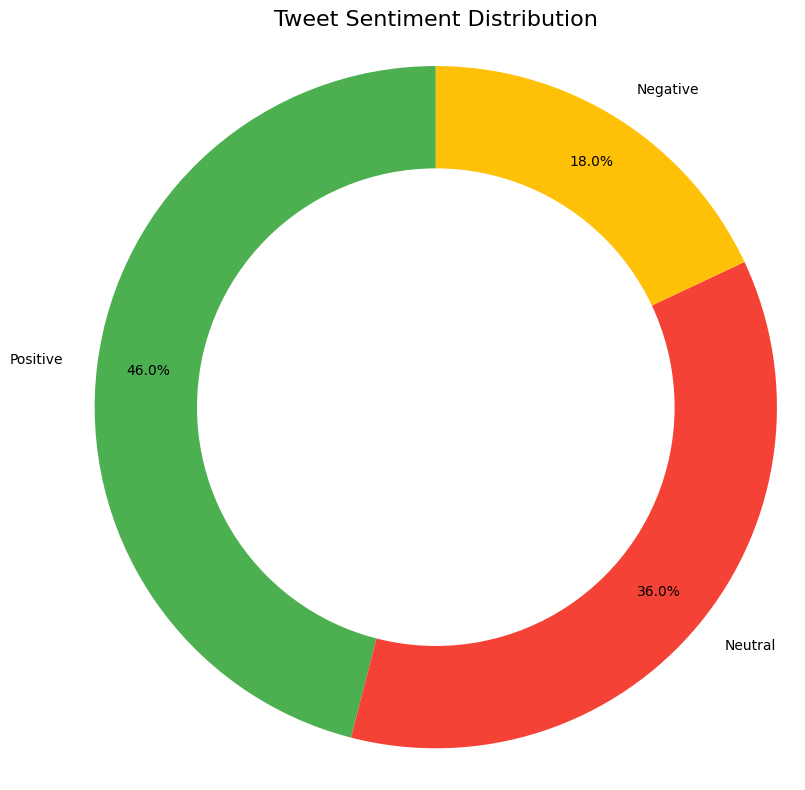

In [205]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['#4CAF50', '#F44336', '#FFC107']  # Green, Red, Yellow

# Create pie chart
wedges, texts, autotexts = plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

# Add circle in the center to create donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio
plt.axis('equal')
plt.title('Tweet Sentiment Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [206]:
df['cleaned_text']

0     just released new update for leap share comple...
1     wouldn it be sick if the iphone 18 would be li...
2     iphone snapshot iphone apple photo snap tokyo ...
3     kidney sold for iphone china iphone ipad kidne...
4     masthu happy aytha bro if selected it would be...
5     nimmiikaur it would be my first iphone if won ...
6     nimmiikaur im only interested in this phone be...
7     i genuinely curious how many people have moved...
8     cybernews research the brand makes instant pho...
9     your videos reimagined make old footage look n...
10    dm now for any hacking services or account rec...
11    when you know what you want and want it bad en...
12    google latest ad takes swing at apple ai lag i...
13    cool iphone cases tap the link into my bio iph...
14    let your screen reflect your mood try this out...
15    iphone 17 pro 256gb dual esim cosmic orange co...
16    ios26 setup widget urban colors pack get it he...
17                      is it better than iphone

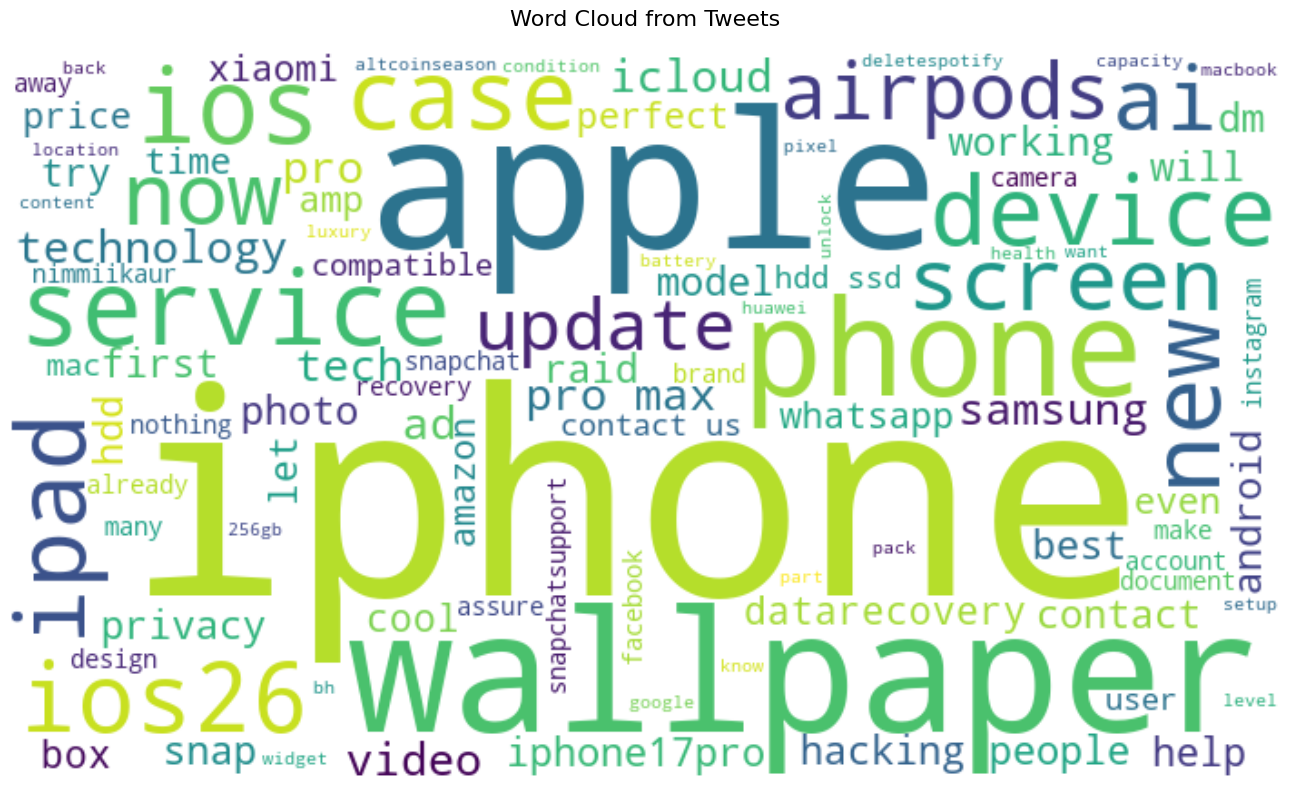

In [220]:
from collections import Counter

# Combine all tweets into one text
all_tweets_text = ' '.join(df['cleaned_text'])

# Create word cloud
wordcloud = WordCloud(
    width=700, 
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    contour_width=1,
    contour_color='steelblue'
).generate(all_tweets_text)

# Display
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Tweets', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [221]:
# Jupyter Notebook Context Overview

This notebook performs sentiment analysis and visualization on tweet data related to iPhones. Below is a summary of the workflow and the purpose of each cell:

1. **Imports and Setup**:  
    The notebook imports essential libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `wordcloud`), text processing (`re`, `nltk`, `textblob`), and image handling (`PIL`). The NLTK VADER lexicon is downloaded for sentiment analysis.

2. **Data Loading and Preparation**:  
    - Two CSV files containing tweet data are loaded into `df_1` and `df_2`.
    - These are concatenated into a single DataFrame `df`.
    - The unnecessary `Unnamed: 0` column is dropped.
    - Duplicate rows are identified and removed.

3. **Text Preprocessing**:  
    - A function `preprocess_text` is defined to clean tweet text by removing retweets, mentions, special characters, URLs, and extra spaces.
    - The cleaned text is stored in a list `prep_text` and added as a new column `cleaned_text` in `df`.

4. **Sentiment Analysis with TextBlob**:  
    - The polarity and subjectivity of each cleaned tweet are computed using TextBlob and stored in lists.
    - These values are added as columns `polarity` and `subjectivity` in `df`.
    - Tweets are labeled as 'Positive' or 'Negative' based on polarity and stored in `sentiment_Textblob`.

5. **Sentiment Analysis with VADER (NLTK)**:  
    - VADER sentiment scores are computed for each cleaned tweet and stored in `sia_scores`.
    - Based on the compound score, tweets are classified as 'Positive', 'Negative', or 'Neutral' and stored in `Sentiment`.
    - Positive, negative, and neutral scores are also extracted and added as columns.

6. **Data Exploration and Visualization**:  
    - The distribution of sentiment labels is displayed using value counts.
    - A pie (donut) chart visualizes the sentiment distribution.
    - A word cloud is generated from all cleaned tweets, excluding common stopwords.

7. **Variables and Data Structures**:  
    - The notebook maintains several variables for intermediate and final results, including lists for sentiment scores, the word cloud object, and the processed DataFrame.

This context provides a comprehensive overview of the notebook's structure and the flow of data from raw tweets to cleaned, analyzed, and visualized results.

SyntaxError: unterminated string literal (detected at line 36) (3718102962.py, line 36)